# Report 1


### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [4]:
import pandas as pd
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 5)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pareto


Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [5]:
report1_dir = '../dras-controller/output/'
output_tex = '../dras-controller/output_tex/'

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    #print(x.to_latex(index=False)) 
    pd.reset_option('display.max_rows')

# plot client function

the scenarios are generated from swf files



procesar pareto

## negoTiation

In [54]:
def plotPareto(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,color):    
       
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT']

        data1 = data[['clients reduction (W)','motor','offer ($)','err','dcCost','socialCost']]
        data1 = data1.round(4)
        #//data1 = data1.set_index('offer ($)')
        
        data = data[data['dcCost']<upper_offer]
        data['offer ($)'] = data['dcCost'] 

        ax.plot(data['dcCost'], data['clients reduction (W)'], label=filename,color=color)

        #print(data1)
    return ax 


def changeLow(name):
    if "highest-deadline-first" in name:
        return "HDF"
    if "highest-penalty-first" in name:
        return "HPF"
    if "highest-mips-first" in name:
        return "LLF"
    if "lowest-id-first" in name:
        return "FCFS"
def getHeu(name):
    if "BTO-g" in name:
        return "BTO-g"
    if "BTO-d" in name:
        return "BTO-d"
    if "ideal" in name:
        return "ideal"
    if "nash" in name:
        return "NE"
    if "PMP" in name:
        return "PMP"
    if "bau" in name:
        return "BaU"
    return name

def plotUpperLvl(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,mark,color):    
    
    data = pd.DataFrame()
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f 
                                                                 and not "bau" in f 
                                                                                                                                  and not "bau" in f 
                                                                 and not "lowest" in f 

                                                                 
                                                                                                                              and ".FUN" in f)]:
        data1 = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data1.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT']
        data1['file'] = filename
        
        data1['clients reduction (W)']=data1['clients reduction (W)'].round(1)
        data1['dcCost']=data1['dcCost'].round(1)       
        
        
        data1['low'] = data1.apply(lambda e:changeLow(e['file']),axis = 1)
        data1['heu'] = data1.apply(lambda e:getHeu(e['file']),axis = 1)
        data1['heu2'] =  data1['heu']+'+' + data1['low']
        data1['point'] = data1.apply(lambda e:
                                     '('+str(e['dcCost'])+','+str(e['clients reduction (W)'])+')'
                                     ,
                                     axis = 1)
        
        
        data1 = data1[['heu2','point']]
        data1 = data1.round(4)
        data = data.append(data1)
    data = data.sort_values(['heu2']) 
    return data 


,heu2,point,heu2,point,heu2,point
0,BTO-d+HDF,"(510.2,5320.0)",BTO-d+HDF,"(144.0,2073.0)",BTO-d+HDF,"(61.1,1222.0)"
0,BTO-d+HPF,"(51450.3,18684.0)",BTO-d+HPF,"(30034.1,12541.0)",BTO-d+HPF,"(12181.3,5939.0)"
0,BTO-d+LLF,"(444.6,5343.0)",BTO-d+LLF,"(232.0,2079.0)",BTO-d+LLF,"(106.4,1205.0)"
0,BTO-g+HDF,"(259.6,5192.0)",BTO-g+HDF,"(103.4,2069.0)",BTO-g+HDF,"(61.1,1222.0)"
0,BTO-g+HPF,"(60108.0,20036.0)",BTO-g+HPF,"(25845.6,10769.0)",BTO-g+HPF,"(13702.8,5593.0)"
0,BTO-g+LLF,"(264.6,5292.0)",BTO-g+LLF,"(102.5,2050.0)",BTO-g+LLF,"(59.9,1198.0)"
0,NE+HDF,"(29866.3,5420.0)",NE+HDF,"(15886.9,2089.0)",NE+HDF,"(7846.7,1228.0)"
0,NE+HPF,"(29794.9,6732.0)",NE+HPF,"(15681.6,3548.0)",NE+HPF,"(6781.7,3479.0)"
0,NE+LLF,"(29864.4,5472.0)",NE+LLF,"(15884.8,2110.0)",NE+LLF,"(7847.1,1219.0)"
0,PMP+HDF,"(2069.0,5413.0)",PMP+HDF,"(346.4,2089.0)",PMP+HDF,"(120.4,1228.0)"


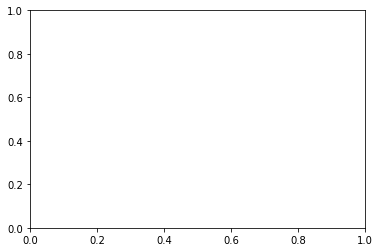

In [60]:
fig, ax = plt.subplots()
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

#plotUpperLvl("small-tol1","","","pareto",2000000,ax,"*","r")
#plotUpperLvl("DRD-6-2-2-het-1","","","pareto",2000000,ax,"*","r")
#plotUpperLvl("DRD-5-20-5-het-1","","","pareto",2000000,ax,"*","r")


data = pd.concat([plotUpperLvl("DRD-20-5-5-hom-1","","","pareto",2000000,ax,"*","r"),
                  plotUpperLvl("DRD-2-6-2-hom-1","","","pareto",2000000,ax,"*","r"),
                  plotUpperLvl("DRD-1-3-1-het-1","","","pareto",2000000,ax,"*","r")
                 ], axis=1)

data
#
#


AttributeError: 'DataFrame' object has no attribute 'legend'

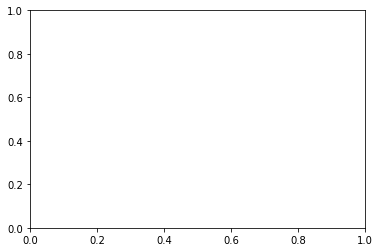

In [29]:

fig, ax = plt.subplots()

ax = plotUpperLvl("large-tol0.4","nash","highest-penalty","null",2000000,ax,"o","b")
ax = plotUpperLvl("large-tol0.4","BTO-d","highest-penalty","null",2000000,ax,"o","r")
ax = plotUpperLvl("large-tol0.4","BTO-g","highest-penalty","null",2000000,ax,"o","g")
ax = plotUpperLvl("large-tol0.4","ideal","highest-penalty","null",2000000,ax,"o","k")
ax = plotUpperLvl("large-tol0.4","PMP","highest-penalty","null",2000000,ax,"o","c")

ax = plotUpperLvl("large-tol0.4","nash","highest-mips","null",2000000,ax,"x","b")
ax = plotUpperLvl("large-tol0.4","BTO-d","highest-mips","null",2000000,ax,"x","r")
ax = plotUpperLvl("large-tol0.4","BTO-g","highest-mips","null",2000000,ax,"x","g")
ax = plotUpperLvl("large-tol0.4","ideal","highest-mips","null",2000000,ax,"x","k")
ax = plotUpperLvl("large-tol0.4","PMP","highest-mips","null",2000000,ax,"x","c")

ax = plotUpperLvl("large-tol0.4","nash","lowest-deadline","null",2000000,ax,"*","b")
ax = plotUpperLvl("large-tol0.4","BTO-d","lowest-deadline","null",2000000,ax,"*","r")
ax = plotUpperLvl("large-tol0.4","BTO-g","lowest-deadline","null",2000000,ax,"*","g")
ax = plotUpperLvl("large-tol0.4","ideal","lowest-deadline","null",2000000,ax,"*","k")
ax = plotUpperLvl("large-tol0.4","PMP","lowest-deadline","null",2000000,ax,"*","c")

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('dcCost ($) ')
ax.set_ylabel('WATTS')

In [ ]:
def showHeu(instance):
    fig, ax = plt.subplots()

    ax = plotUpperLvl(instance,"pareto","highest-penalty","null",120000,ax,"o","y")
    ax = plotUpperLvl(instance,"nash","highest-penalty","null",170000,ax,"o","b")
    ax = plotUpperLvl(instance,"BTO-d","highest-penalty","null",170000,ax,"o","r")
    ax = plotUpperLvl(instance,"BTO-g","highest-penalty","null",170000,ax,"o","g")
    ax = plotUpperLvl(instance,"ideal","highest-penalty","null",170000,ax,"o","k")
    ax = plotUpperLvl(instance,"PMP","highest-penalty","null",170000,ax,"o","c")

    #ax = plotUpperLvl("large-tol0.4","pareto","highest-mips","null",120000,ax,"x","y")
    ax = plotUpperLvl(instance,"nash","highest-mips","null",170000,ax,"x","b")
    ax = plotUpperLvl(instance,"BTO-d","highest-mips","null",170000,ax,"x","r")
    ax = plotUpperLvl(instance,"BTO-g","highest-mips","null",170000,ax,"x","g")
    ax = plotUpperLvl(instance,"ideal","highest-mips","null",170000,ax,"x","k")
    ax = plotUpperLvl(instance,"PMP","highest-mips","null",170000,ax,"x","c")

    #ax = plotUpperLvl("large-tol0.4","pareto","lowest-deadline","null",120000,ax,"*","y")
    ax = plotUpperLvl(instance,"nash","lowest-deadline","null",170000,ax,"*","b")
    ax = plotUpperLvl(instance,"BTO-d","lowest-deadline","null",170000,ax,"*","r")
    ax = plotUpperLvl(instance,"BTO-g","lowest-deadline","null",170000,ax,"*","g")
    ax = plotUpperLvl(instance,"ideal","lowest-deadline","null",170000,ax,"*","k")
    ax = plotUpperLvl(instance,"PMP","lowest-deadline","null",170000,ax,"*","c")


    ax.legend(loc='best', bbox_to_anchor=(1,1))
    ax.set_xlabel('dcCost ($) ')
    ax.set_ylabel('WATTS')

showHeu('medium-tol1')
showHeu('medium-tol0.8')
showHeu('medium-tol0.4')

    
    
    

In [ ]:
fig, ax = plt.subplots()
ax = plotUpperLvl("large-tol0.8","pareto","highest-penalty","null",2000000,ax,"o","y")
ax = plotUpperLvl("large-tol0.8","nash","highest-penalty","null",2000000,ax,"o","b")
ax = plotUpperLvl("large-tol0.8","BTO-d","highest-penalty","null",2000000,ax,"o","r")
ax = plotUpperLvl("large-tol0.8","BTO-g","highest-penalty","null",2000000,ax,"o","g")
ax = plotUpperLvl("large-tol0.8","ideal","highest-penalty","null",2000000,ax,"x","k")
ax = plotUpperLvl("large-tol0.8","PMP","highest-penalty","null",2000000,ax,"o","c")

ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('dcCost ($) ')
ax.set_ylabel('WATTS')


In [ ]:
fig, ax = plt.subplots()
ax = plotUpperLvl("medium-tol1","pareto","highest-penalty","null",2000000,ax,"o","y")
ax = plotUpperLvl("medium-tol1","nash","highest-penalty","null",2000000,ax,"o","b")
ax = plotUpperLvl("medium-tol1","BTO-d","highest-penalty","null",2000000,ax,"o","r")
ax = plotUpperLvl("medium-tol1","BTO-g","highest-penalty","null",2000000,ax,"o","g")
ax = plotUpperLvl("medium-tol1","ideal","highest-penalty","null",2000000,ax,"x","k")
ax = plotUpperLvl("medium-tol1","PMP","highest-penalty","null",2000000,ax,"o","c")

ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('dcCost ($) ')
ax.set_ylabel('WATTS')

In [ ]:
fig, ax = plt.subplots()
ax = plotUpperLvl("large-tol0.8","pareto","highest-penalty","null",2000000,ax,"o","y")
ax = plotUpperLvl("large-tol0.8","pareto","highest-mips","null",2000000,ax,"o","b")
ax = plotUpperLvl("large-tol0.8","pareto","highest-deadline","null",2000000,ax,"o","r")
#ax = plotUpperLvl("large-tol0.8","pareto","","null",2000000,ax,"o","y")


ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('dcCost ($) ')
ax.set_ylabel('WATTS')

In [ ]:
fig, ax = plt.subplots()
ax = plotUpperLvl("large-tol0.8","pareto","highest-penalty","null",30000,ax,"o","y")
ax = plotUpperLvl("large-tol0.8","pareto","highest-mips","null",30000,ax,"o","b")
ax = plotUpperLvl("large-tol0.8","pareto","highest-deadline","null",30000,ax,"o","r")
#ax = plotUpperLvl("large-tol0.8","pareto","","null",2000000,ax,"o","y")


ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('dcCost ($) ')
ax.set_ylabel('WATTS')